<a href="https://colab.research.google.com/github/robertocsa/Natural-Language-Processing-NLP-/blob/main/Exemplos_pr%C3%A1ticos_de_uso_de_modelos_de_IA_generativa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# É necessário habilitar a execução de uma GPU. No Colab, acesse o Ambiente de execução > Alterar o tipo de ambiente de execução >
# T4 GPU (testei nessa opção)

import torch

if torch.cuda.is_available():
    print("GPU disponível")
else:
    print("GPU não disponível")


GPU disponível


In [24]:
# Importando bibliotecas necessárias
from transformers import T5Tokenizer, T5ForConditionalGeneration
import torch

# 1. Carregando o modelo e o tokenizador
model_name = "t5-base"  # Usando o modelo T5-base
tokenizer = T5Tokenizer.from_pretrained(model_name)
model = T5ForConditionalGeneration.from_pretrained(model_name)

# 2. Definindo um texto longo para resumo
text = """
A inteligência artificial generativa tem se tornado uma ferramenta poderosa em diversas áreas.
Ela é capaz de criar conteúdo original, gerar imagens, e até mesmo compor música.
Os modelos mais recentes, como o GPT-3 e o T5, utilizam técnicas avançadas de aprendizado de máquina
para produzir resultados que podem ser indistinguíveis do trabalho humano.
Esses modelos aprendem a partir de vastos conjuntos de dados, permitindo que eles compreendam e
produzam linguagem de maneira coerente e contextualmente relevante.
O impacto da IA generativa é sentido em áreas como marketing, redação de conteúdo e desenvolvimento
de software, onde a automação de tarefas pode levar a uma maior eficiência e criatividade.
"""

# 3. Tokenizando o texto e gerando o resumo
input_ids = tokenizer.encode("summarize: " + text, return_tensors="pt")  # Adicionando o prefixo "summarize:"

# 4. Gerando o resumo
output_ids = model.generate(input_ids,
                            max_length=1000,
                            min_length=25,
                            length_penalty=2.0,
                            num_beams=4,
                            early_stopping=False)

# 5. Decodificando e exibindo o resumo gerado
summary = tokenizer.decode(output_ids[0], skip_special_tokens=True)
print("Resumo:")
print(summary)


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Resumo:
a inteligência artificial generativa tem se tornado uma ferramenta poderosa em diversas áreas. Os modelos mais recentes, como o GPT-3 e o T5, utilizam técnicas avançadas de aprendizado de máquina para produzir resultados que podem ser indistinguveis do trabalho humano


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


  0%|          | 0/50 [00:00<?, ?it/s]

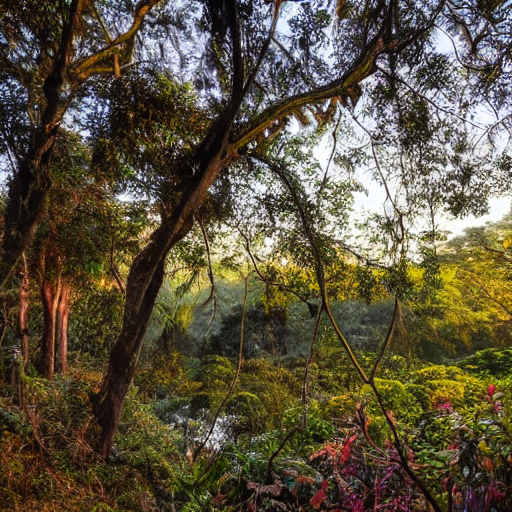

In [27]:
# Instalação das dependências necessárias
!pip install diffusers[torch] transformers pillow

# Importando bibliotecas
import torch
from diffusers import StableDiffusionPipeline
from PIL import Image

# 1. Carregando o modelo Stable Diffusion
model_id = "CompVis/stable-diffusion-v1-4"  # ID do modelo no Hugging Face
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda")  # Mover para GPU, se disponível

# 2. Definindo o prompt para geração da imagem
prompt = "Um castelo mágico em uma floresta encantada durante o pôr do sol"

# 3. Gerando a imagem
with torch.no_grad():
    images = pipe(prompt, num_inference_steps=50, guidance_scale=7.5).images  # Atualizando a maneira de acessar a imagem

# 4. Exibindo a imagem gerada
image = images[0]  # Acessando a primeira imagem da lista de imagens geradas
image.show()

# Se você quiser exibir a imagem diretamente no Colab, você pode usar o seguinte:
image.save("generated_image.png")  # Salva a imagem como um arquivo
Image.open("generated_image.png")  # Abre a imagem usando PIL para visualização no Colab


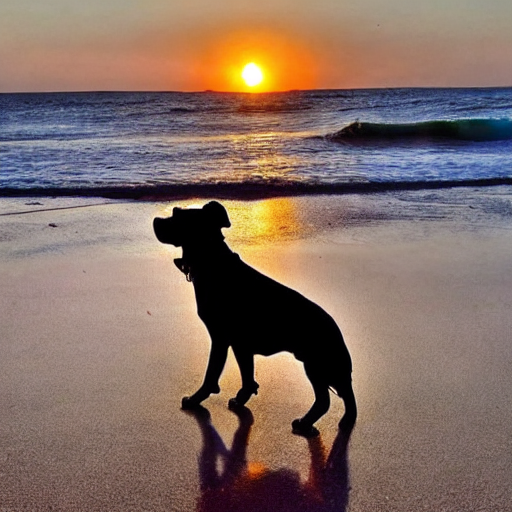

In [33]:
# 2. Definindo o prompt para geração de outra imagem
prompt = "Um céu estrelado em um lindo entardecer. Mostra um cachorro correndo na praia."
'''
# 3. Gerando a imagem
with torch.no_grad():
    images = pipe(prompt, num_inference_steps=250, guidance_scale=7.5).images  # Atualizando a maneira de acessar a imagem
'''
# 4. Exibindo a imagem gerada
image = images[0]  # Acessando a primeira imagem da lista de imagens geradas
image.show()

# Se você quiser exibir a imagem diretamente no Colab, você pode usar o seguinte:
image.save("generated_image2.png")  # Salva a imagem como um arquivo
Image.open("generated_image2.png")  # Abre a imagem usando PIL para visualização no Colab


In [32]:
print(images)

[<PIL.Image.Image image mode=RGB size=512x512 at 0x7B410D6BC760>]


**Modelos de IA Generativa: Explicações Técnicas**

**1. Introdução à IA Generativa**
A Inteligência Artificial generativa refere-se a algoritmos que podem criar novos dados a partir de padrões aprendidos em conjuntos de dados existentes. Esses modelos têm ganhado destaque em diversas áreas, como geração de texto, imagens, música e até vídeos. A capacidade de criar conteúdo original e relevante tem inúmeras aplicações, incluindo:


*   *Criação de Conteúdo*: Geração automática de textos, artigos e histórias.
*   *Design e Arte*: Criação de imagens e gráficos baseados em descrições textuais.
*   *Desenvolvimento de Jogos*: Geração de cenários e narrativas dinâmicas.

Os modelos de IA generativa podem ser classificados em várias categorias, incluindo modelos baseados em transformadores e modelos de difusão.

**2. Modelos de IA Generativa Abertos**

**2.1 GPT-2 (Generative Pre-trained Transformer 2)**

O GPT-2, desenvolvido pela OpenAI, é um modelo de linguagem baseado em transformadores, que é capaz de gerar texto coerente e relevante a partir de um prompt inicial. A arquitetura do GPT-2 é baseada no trabalho de Vaswani et al. (2017), que introduziu o conceito de atenção como um mecanismo central em redes neurais.

Funcionamento:

Pré-treinamento: O modelo é treinado em um grande corpus de texto (por exemplo, artigos, livros, sites) usando uma técnica chamada modelagem de linguagem, onde o modelo aprende a prever a próxima palavra em uma sequência.

Atenção: O mecanismo de atenção permite que o modelo considere diferentes partes da entrada ao gerar cada palavra, o que melhora a coerência e a relevância do texto gerado.

Fine-tuning: Após o pré-treinamento, o modelo pode ser ajustado para tarefas específicas, como resumo, tradução ou respostas a perguntas.

**2.2 Stable Diffusion**
O Stable Diffusion é um modelo de geração de imagens que utiliza técnicas de difusão para criar imagens a partir de descrições textuais. Desenvolvido pela comunidade de pesquisa em IA, o modelo combina métodos de aprendizado profundo e processamento de imagens.

Funcionamento:

Difusão: A técnica de difusão envolve a adição de ruído a uma imagem até que ela se torne indistinguível e, em seguida, um modelo é treinado para reverter esse processo, permitindo a geração de novas imagens a partir de entradas de texto.

Modelo Latente: O Stable Diffusion opera em um espaço latente, onde as representações das imagens são mais compactas e manipuláveis, facilitando a geração rápida e de alta qualidade.
Condicionamento Textual: A geração de imagens é condicionada por descrições textuais, onde um modelo de linguagem interpreta o texto e orienta a criação visual.

**3. Exemplo Prático com GPT-2**

No exemplo prático, usamos o GPT-2 para gerar texto com base em um prompt. Aqui está uma análise técnica dos passos envolvidos:

**3.1 Carregamento do Modelo e Tokenização**

Tokenização: O modelo converte o texto em tokens (unidades menores, como palavras ou subpalavras) que são usados como entrada para a rede neural.

Modelo: O modelo é carregado em memória, o que permite a geração de texto em tempo real.

**3.2 Geração de Texto**

Processo de Geração: Ao fornecer um prompt, o modelo prevê as próximas palavras com base nas probabilidades aprendidas. O número de palavras geradas pode ser controlado pela definição de max_length.

*Decodificação*: O texto gerado é convertido de volta de tokens para texto legível.

**4. Exemplo Prático com Stable Diffusion**

Neste exemplo, usamos o Stable Diffusion para gerar uma imagem a partir de um texto descritivo. A seguir, uma análise técnica:

**4.1 Carregamento do Modelo**

Pipeline: O modelo é carregado através de um pipeline que integra os componentes necessários para a geração de imagens, incluindo a inferência em GPU para acelerar o processamento.

**4.2 Geração de Imagem**

Interpretação de Texto: O prompt textual é interpretado pelo modelo, que utiliza um vetor de características para guiar a geração da imagem.

Processo de Difusão: O modelo reverte o processo de difusão, removendo gradualmente o ruído para criar uma imagem visualmente coesa que corresponda ao texto fornecido.

**5. Conclusões e Futuras Direções**

A IA generativa representa um avanço significativo na capacidade das máquinas de criar conteúdo original. Embora haja preocupações sobre a qualidade dos dados, viés algorítmico e uso ético, o potencial para inovação é vasto. A pesquisa futura pode se concentrar em:

Melhorar a Robustez: Trabalhar em modelos que sejam menos suscetíveis a viés e possam gerar conteúdo mais inclusivo e diversificado.
Acessibilidade: Aumentar a disponibilidade de modelos de IA generativa para desenvolvedores e pesquisadores, promovendo a colaboração e inovação.
Integração com Outras Tecnologias: Explorar como a IA generativa pode ser integrada a outras áreas, como realidade aumentada, assistentes pessoais e robótica.
Referências Acadêmicas
Brown, T. et al. (2020). Language Models are Few-Shot Learners. https://arxiv.org/abs/2005.14165
Ramesh, A. et al. (2021). Zero-Shot Text-to-Image Generation. https://arxiv.org/abs/2102.12092
Vaswani, A. et al. (2017). Attention is All You Need. https://arxiv.org/abs/1706.03762
Essas explicações técnicas e científicas proporcionam uma visão aprofundada dos conceitos, funcionamento e implicações dos modelos de IA generativa apresentados anteriormente.